<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Создание-данных-для-демонстрации-работы-функций." data-toc-modified-id="Создание-данных-для-демонстрации-работы-функций.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Создание данных для демонстрации работы функций.</a></span></li><li><span><a href="#Вывод-информации-о-данных-в-табличном-виде" data-toc-modified-id="Вывод-информации-о-данных-в-табличном-виде-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод информации о данных в табличном виде</a></span></li><li><span><a href="#Вывод-информации-о-данных-в-графическом-виде" data-toc-modified-id="Вывод-информации-о-данных-в-графическом-виде-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод информации о данных в графическом виде</a></span></li><li><span><a href="#Оценка-наличия-зависимостей-параметров-друг-от-друга-в-графическом-виде" data-toc-modified-id="Оценка-наличия-зависимостей-параметров-друг-от-друга-в-графическом-виде-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Оценка наличия зависимостей параметров друг от друга в графическом виде</a></span></li></ul></div>

## Создание данных для демонстрации работы функций.

In [1]:
import pandas as pd
import numpy as np

# Задаём количество данных
num_cols = 4
cat_cols = 4
target_col = 1
n_samples = 1000

# Генерируем данные
num_data = np.random.normal(1, 2, size=(n_samples, num_cols))
num_depend_val_data = num_data**2 + 10
cat_data = np.random.choice(['A', 'B', 'C'], size=(n_samples, cat_cols))
target_data = np.random.randint(0, 2, size=(n_samples, target_col))


# Создаем названия для столбцов
num_cols_names = [f'num_{i+1}' for i in range(num_cols*2)]
cat_cols_names = [f'cat_{i+1}' for i in range(cat_cols)]
target_col_name = 'target'

# Создаем датафрейм
df = pd.DataFrame(np.concatenate([num_data, num_depend_val_data, cat_data, target_data], axis=1), 
                  columns=num_cols_names+cat_cols_names+[target_col_name])

df[num_cols_names] = df[num_cols_names].astype('float16')
df[cat_cols_names] = df[cat_cols_names].astype('category')
df[target_col_name] = df[target_col_name].astype('int8')

df.head()

,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,cat_1,cat_2,cat_3,cat_4,target
0,4.003906,-1.124023,-2.753906,-1.334961,26.015625,11.265625,17.593750,11.781250,A,B,A,A,0
1,3.041016,-1.355469,0.957031,4.015625,19.250000,11.835938,10.914062,26.140625,C,B,A,B,0
2,-0.112976,1.186523,3.158203,1.738281,10.015625,11.406250,19.984375,13.023438,B,A,A,C,1
3,0.301758,1.336914,5.167969,5.210938,10.093750,11.789062,36.718750,37.187500,C,B,C,A,1
4,-1.487305,0.542969,-0.798828,-3.351562,12.210938,10.296875,10.640625,21.234375,B,A,B,C,0


## Вывод информации о данных в табличном виде

In [2]:
def table_feature_analysis(*, data: pd.DataFrame, cat_features: list = [], num_features: list = []) -> object:
    ''' 
    Функция для вывода таблицы с общей информацией о категориальных и числовых признаках в датафрейма.
    
    На вход функция принимает:
    1. data - датафрейм с данными;
    2. cat_features - список с названиями столбцов, содержащих категориальные данные;
    3. num_features - список с названиями столбцов числовых признаков.
    
    На выходе функция выводит таблицу со следующими данными по всем признакам:
    1. Тип данных в исходном датафрейме для каждого признака.
    2. Количество данных в исходном датафрейме для каждого признака.
    3. Количество пропусков в исходном датафрейме для каждого признака.
    4. Доля пропусков от общего количества строк в датафрейме для каждого признака.
    
    Дополнительно для числовых признаков в итоговой таблице расчитываются статистические данные о признаке.    
    '''
    import pandas as pd
    
    all_features = num_features + cat_features
    
    data = data[all_features]
    
    desc = pd.DataFrame(index=data.columns.to_list())
    
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['null'] = df.isna().sum()
    desc['%null'] = desc['null'] / len(df) * 100
           
    if num_features or binar_cat_features:
        desc = pd.concat([desc, data[num_features].describe().T.drop(['count'], axis=1)], axis=1)
        desc.loc[num_features, "skew"] = data[num_features].skew()
        desc.loc[num_features, "kurtosis"] = data[num_features].kurtosis()
        
    if cat_features:
        desc['nunique'] = df[cat_features].nunique()
        
    desc = desc.round(2)
    
    return desc

***Пример:***

In [3]:
table_feature_analysis(data=df, 
                       cat_features=cat_cols_names, 
                       num_features=num_cols_names)

C:\Users\AAV19\anaconda3\lib\site-packages\pandas\core\nanops.py:1299: RuntimeWarning: overflow encountered in square
  adj = 3 * (count - 1) ** 2 / ((count - 2) * (count - 3))
C:\Users\AAV19\anaconda3\lib\site-packages\pandas\core\nanops.py:1299: RuntimeWarning: overflow encountered in multiply
  adj = 3 * (count - 1) ** 2 / ((count - 2) * (count - 3))
C:\Users\AAV19\anaconda3\lib\site-packages\pandas\core\nanops.py:1300: RuntimeWarning: overflow encountered in multiply
  numerator = count * (count + 1) * (count - 1) * m4
C:\Users\AAV19\anaconda3\lib\site-packages\pandas\core\nanops.py:1301: RuntimeWarning: overflow encountered in multiply
  denominator = (count - 2) * (count - 3) * m2**2


,type,count,null,%null,mean,std,min,25%,50%,75%,max,skew,kurtosis,nunique
num_1,float16,1000,0,0.0,1.06,1.97,-5.02,-0.22,1.06,2.35,6.79,-0.049988,NaN,NaN
num_2,float16,1000,0,0.0,0.99,2.00,-6.46,-0.34,0.94,2.38,7.34,-0.029999,NaN,NaN
num_3,float16,1000,0,0.0,1.00,1.97,-5.95,-0.31,0.94,2.29,7.80,0.059998,NaN,NaN
num_4,float16,1000,0,0.0,1.06,2.08,-5.38,-0.41,1.11,2.55,7.16,-0.020004,NaN,NaN
num_5,float16,1000,0,0.0,14.99,6.88,10.00,10.49,12.24,16.52,56.03,2.349609,NaN,NaN
num_6,float16,1000,0,0.0,14.99,6.99,10.00,10.47,12.20,16.71,63.94,2.480469,NaN,NaN
num_7,float16,1000,0,0.0,14.88,7.13,10.00,10.44,12.19,16.25,70.81,3.060547,NaN,NaN
num_8,float16,1000,0,0.0,15.45,7.27,10.00,10.64,12.45,17.75,61.31,2.380859,NaN,NaN
cat_1,category,1000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
cat_2,category,1000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


## Вывод информации о данных в графическом виде

In [4]:
def graph_feature_analysis(*, data: pd.DataFrame, cat_features: list = [], num_features: list = [], target: str):
    ''' 
    Функция для вывода графичиской информации о категориальных и числовых признаках 
    с разделением по целевому признаку (для задачи классификации).
    
    На вход функция принимает:
    1. data - датафрейм с данными;
    2. cat_features - список с названиями столбцов категориальных признаков;
    3. num_features - список с названиями столбцов числовых признаков;
    4. target - наименование колонки с целевым признаком.
    
    На выходе функция выводит следующие графикии:
    1. Для числовых данных - гистограммы, разделённые по целевому признаку.
    2. Для категориальных данных - столбчатые диаграммы, разделённые по целевому признаку.
    '''

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    if target in cat_features:
        cat_features.remove(target)
    elif target in num_features:
        num_features.remove(target)
    
    all_features = num_features + cat_features
    
    data = data[all_features + [target]]
    
    num_of_lines = len(all_features)
    
    plt.figure(figsize = (13, int(num_of_lines*2)))

    for i, col in enumerate(all_features):
        plt.subplot(num_of_lines // 2 + num_of_lines % 2, 2, i+1)
        plt.grid()
        
        if col in num_features:   
            sns.histplot(data=data, x=col, kde=True, hue=target,  palette='tab10', fill=True, bins = 50)
        else:
            sns.countplot(data=data, x=col, hue=target)
            
    plt.tight_layout()
    plt.show()

***Пример:***

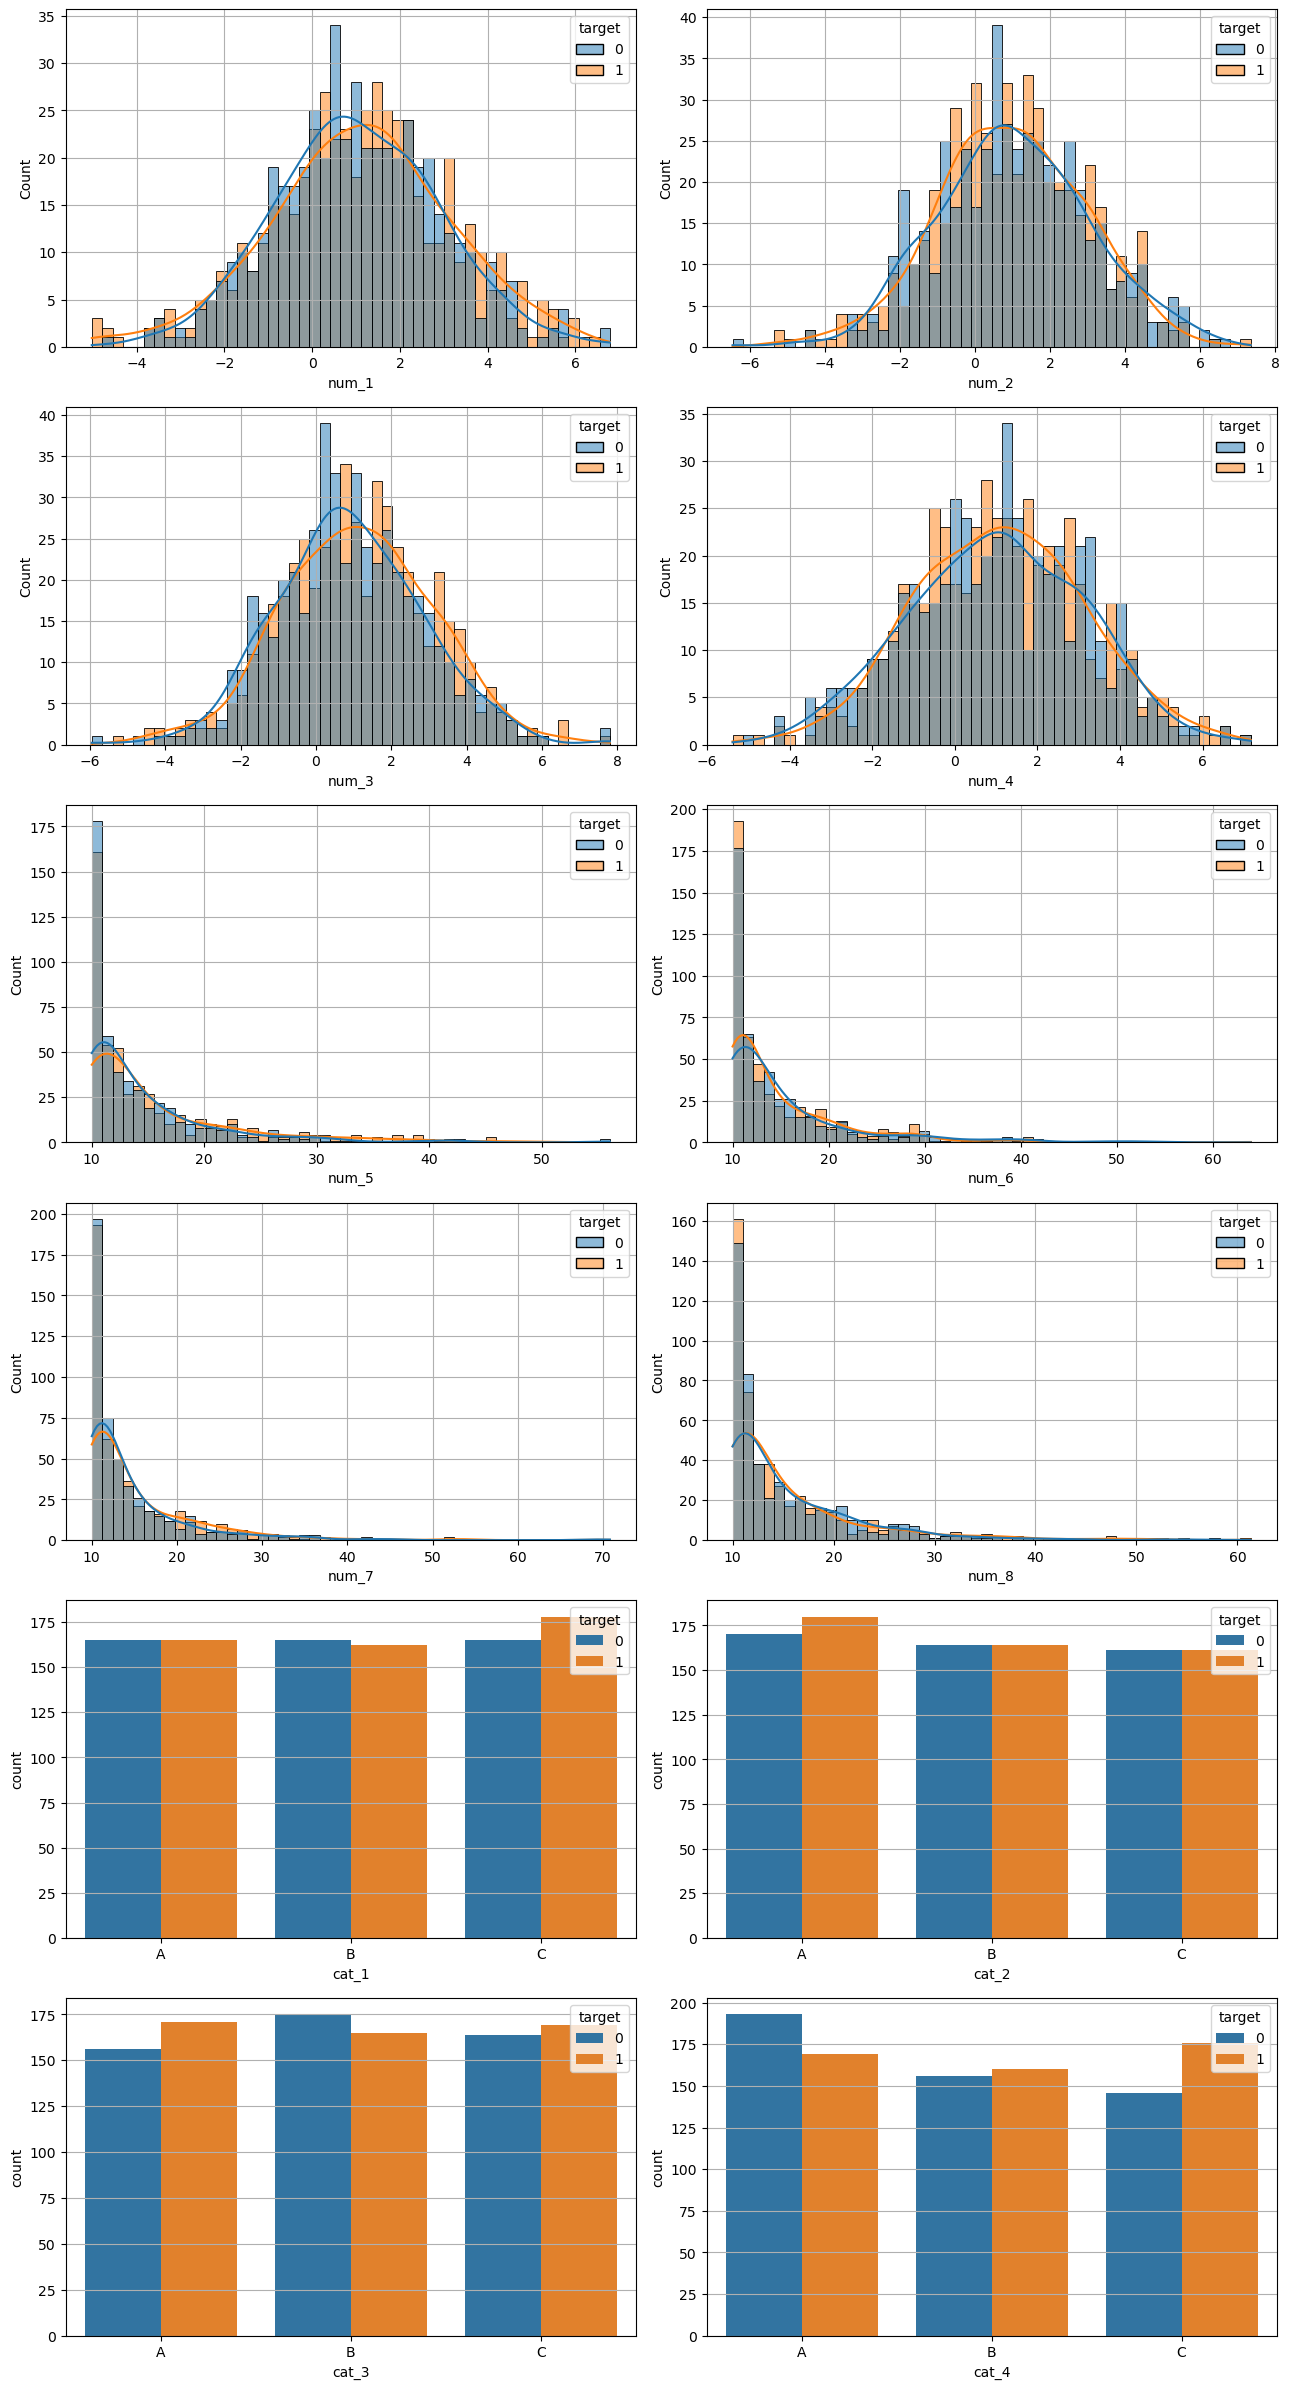

In [5]:
graph_feature_analysis(data=df, 
                       cat_features=cat_cols_names, 
                       num_features=num_cols_names, 
                       target=target_col_name)

## Оценка наличия зависимостей параметров друг от друга в графическом виде

In [6]:
def dependency_analysis(*, data: pd.DataFrame, columns: list = []):
    '''
    Функция для оценки наличия зависимостей параметров между собой в графическом виде.
    
    На вход функция принимает:
    1. data - датафрейм с данными;
    2. columns - список колонок, которые необходимо оценить.
    
    На выходе функция выводит следующие графики:
    1. Гистограмму данных по каждой колонке из списка columns.
    2. Графики зависимостей всех параметров друг от друга.
    
    '''
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    for i in range(len(columns)):
        
        print('*'*30, 'Колонка ', columns[i], '*'*30)
        fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
        ax.set_xlabel(columns[i])
        ax.set_ylabel('Количество данных')
        ax.set_title("Гистограмма")
        plt.hist(df[columns[i]], bins=30)
        plt.grid()
        plt.show()
        
        num_graphs = len(columns) - i - 1
        
        if num_graphs > 2:
            fig, axs = plt.subplots(num_graphs//2+num_graphs%2, 2, figsize=(13, int(num_graphs*3)))
        
            for k in range(i+1, len(columns)):
                idx_graph = k-i-1
                axs[idx_graph//2, idx_graph%2].scatter(df[columns[k]], df[columns[i]])
                axs[idx_graph//2, idx_graph%2].set_xlabel(columns[k])
                axs[idx_graph//2, idx_graph%2].set_ylabel(columns[i])
                axs[idx_graph//2, idx_graph%2].set_title('Зависимость '+columns[i]+' от '+ str(columns[k]))
                axs[idx_graph//2, idx_graph%2].grid()
            
            plt.show()
        
        elif num_graphs == 2 or num_graphs == 1:
            fig, axs = plt.subplots(1, 2, figsize=(13, int(num_graphs*3)))
        
            for k in range(i+1, len(columns)):
                idx_graph = k-i-1
                axs[idx_graph%2].scatter(df[columns[k]], df[columns[i]])
                axs[idx_graph%2].set_xlabel(columns[k])
                axs[idx_graph%2].set_ylabel(columns[i])
                axs[idx_graph%2].set_title('Зависимость '+columns[i]+' от '+str(columns[k]))
                axs[idx_graph%2].grid()
            
            plt.show()

***Пример:***

****************************** Колонка  num_1 ******************************


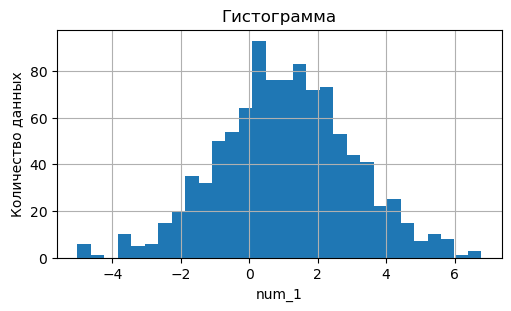

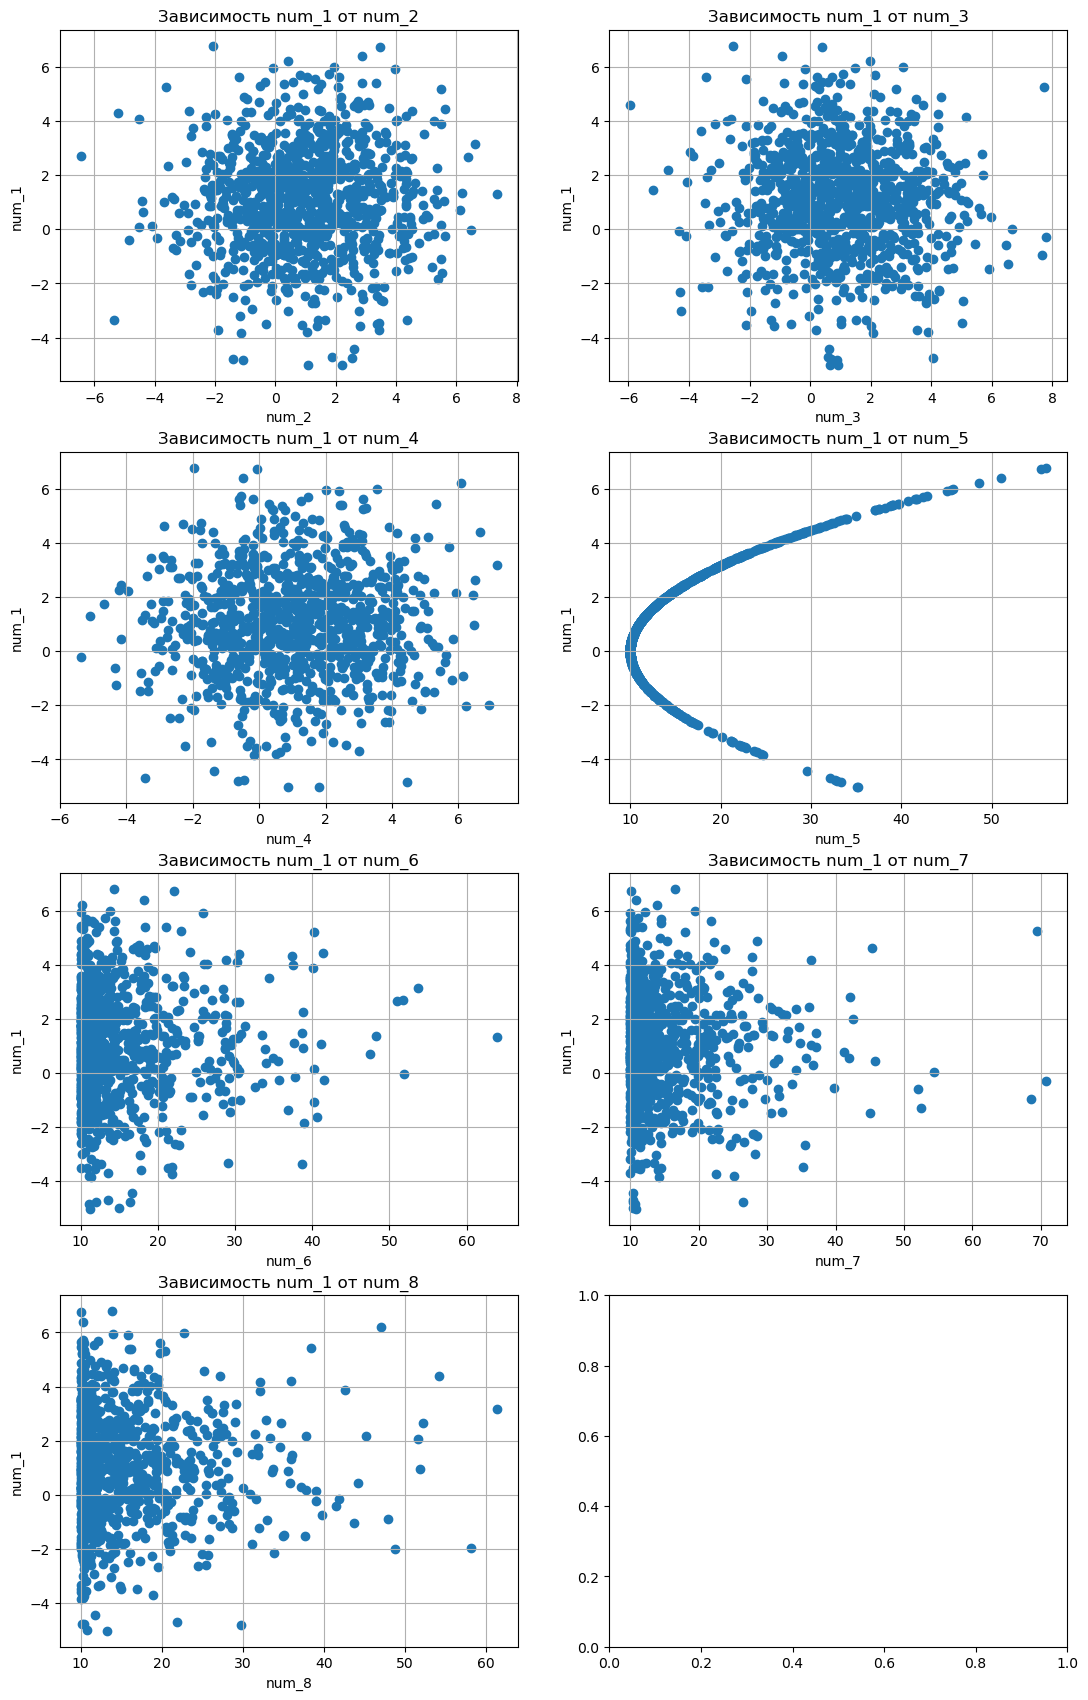

****************************** Колонка  num_2 ******************************


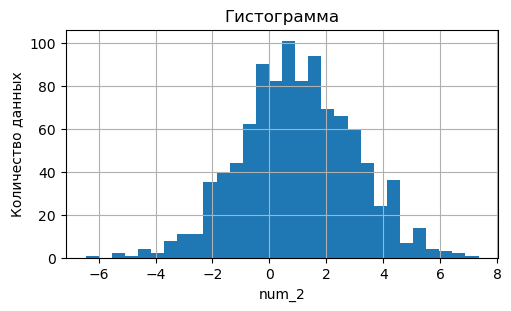

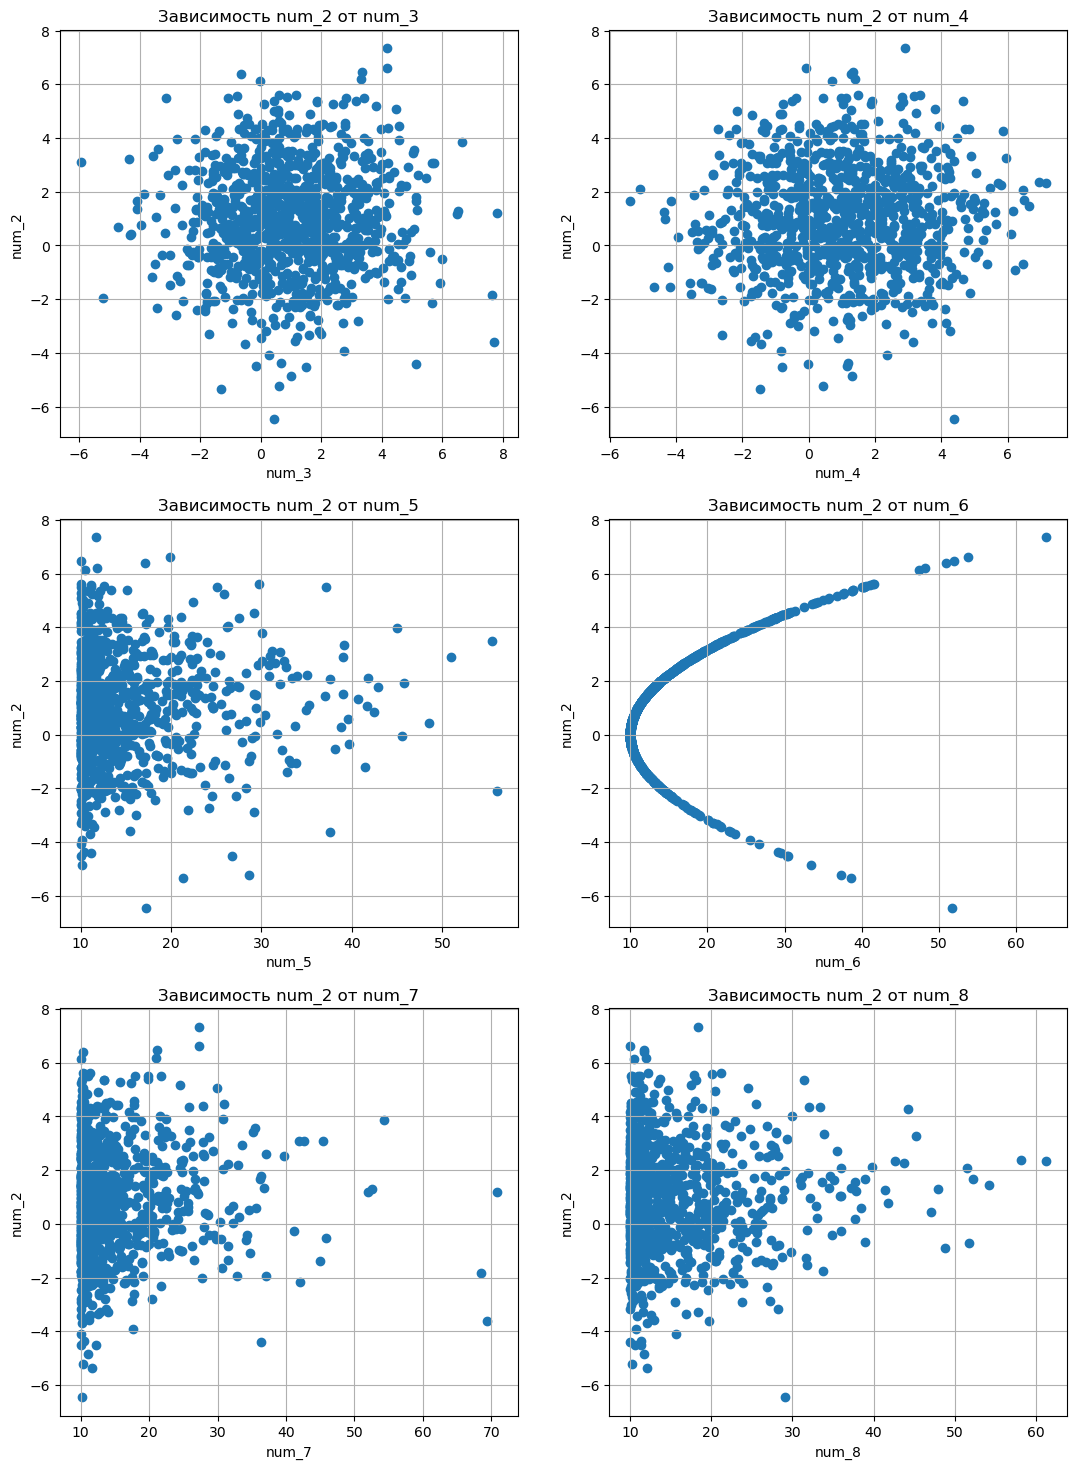

****************************** Колонка  num_3 ******************************


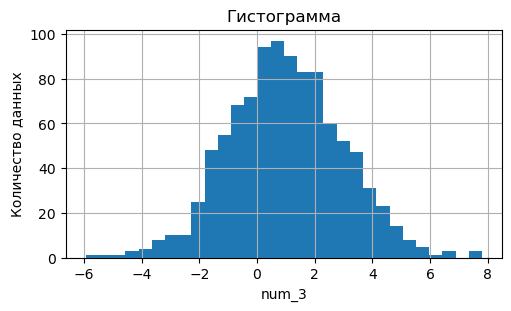

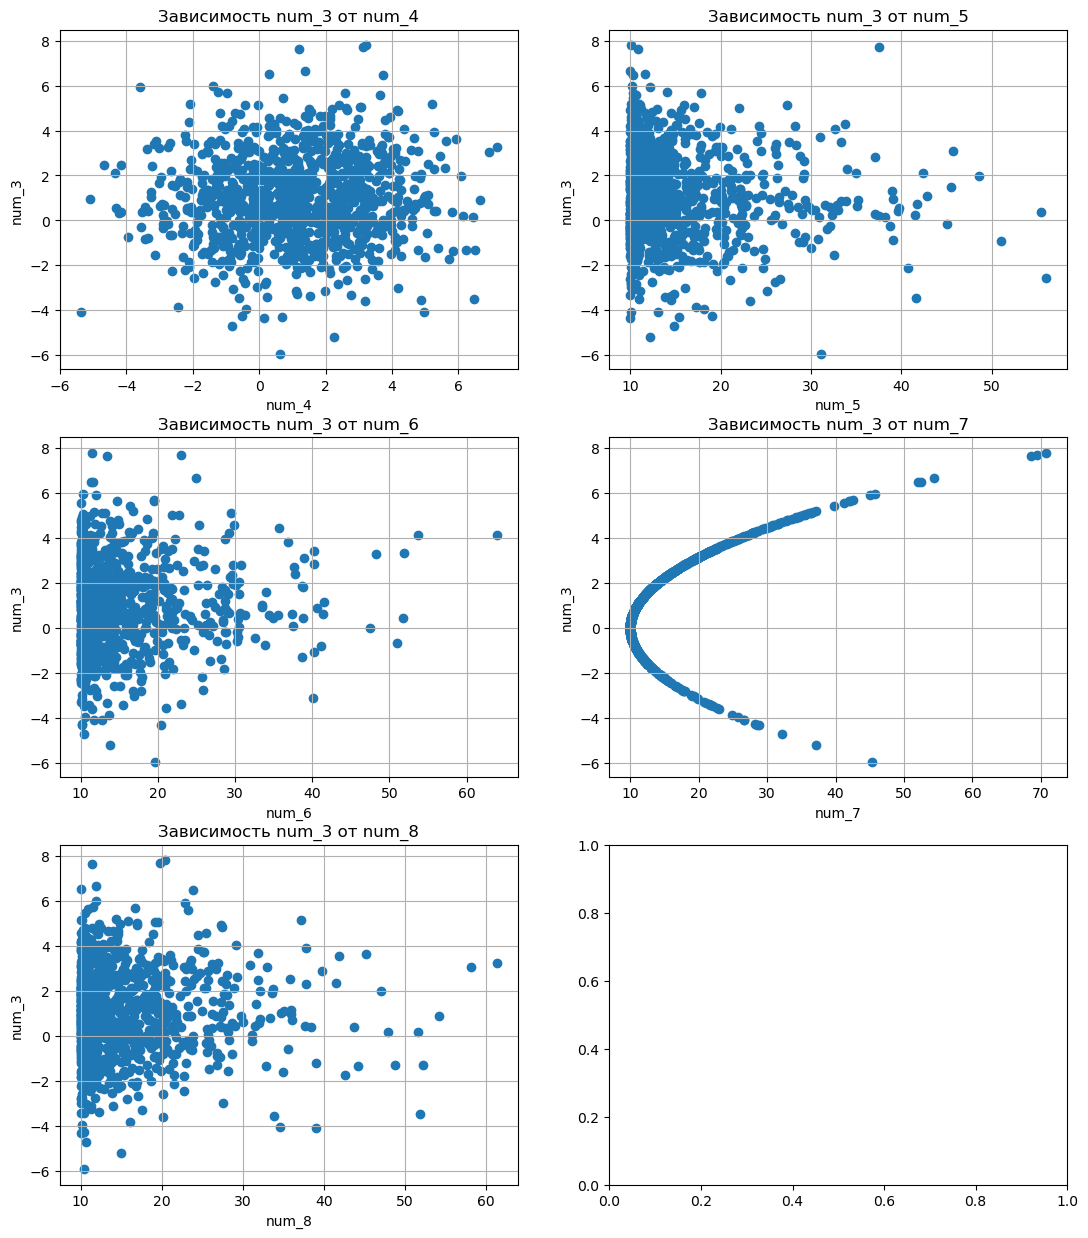

****************************** Колонка  num_4 ******************************


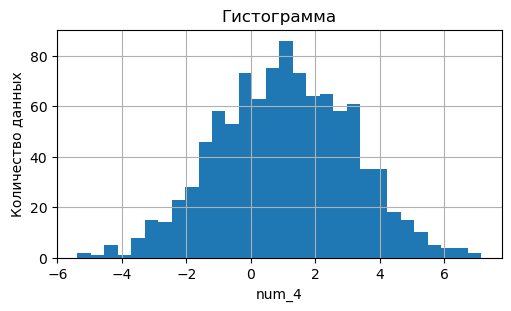

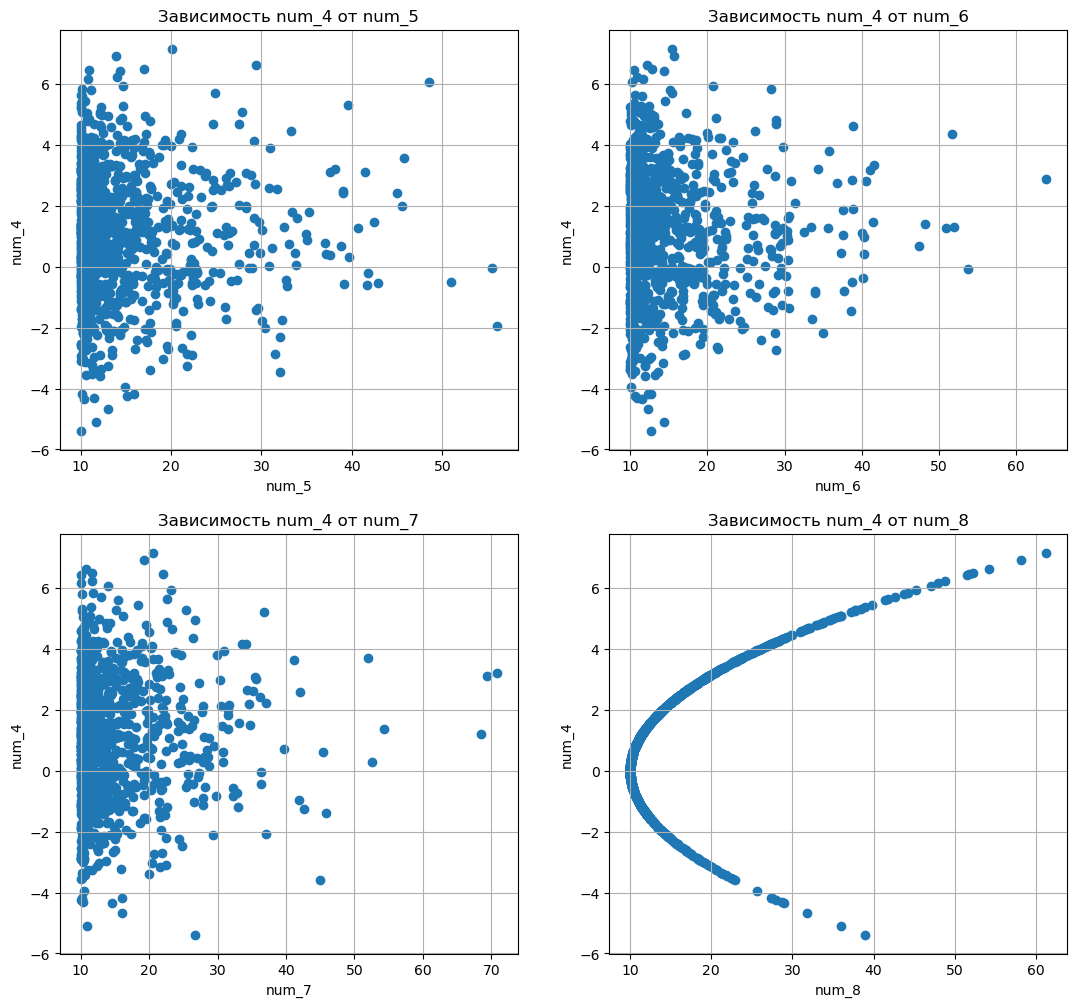

****************************** Колонка  num_5 ******************************


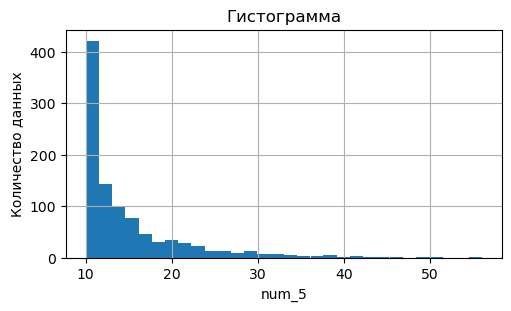

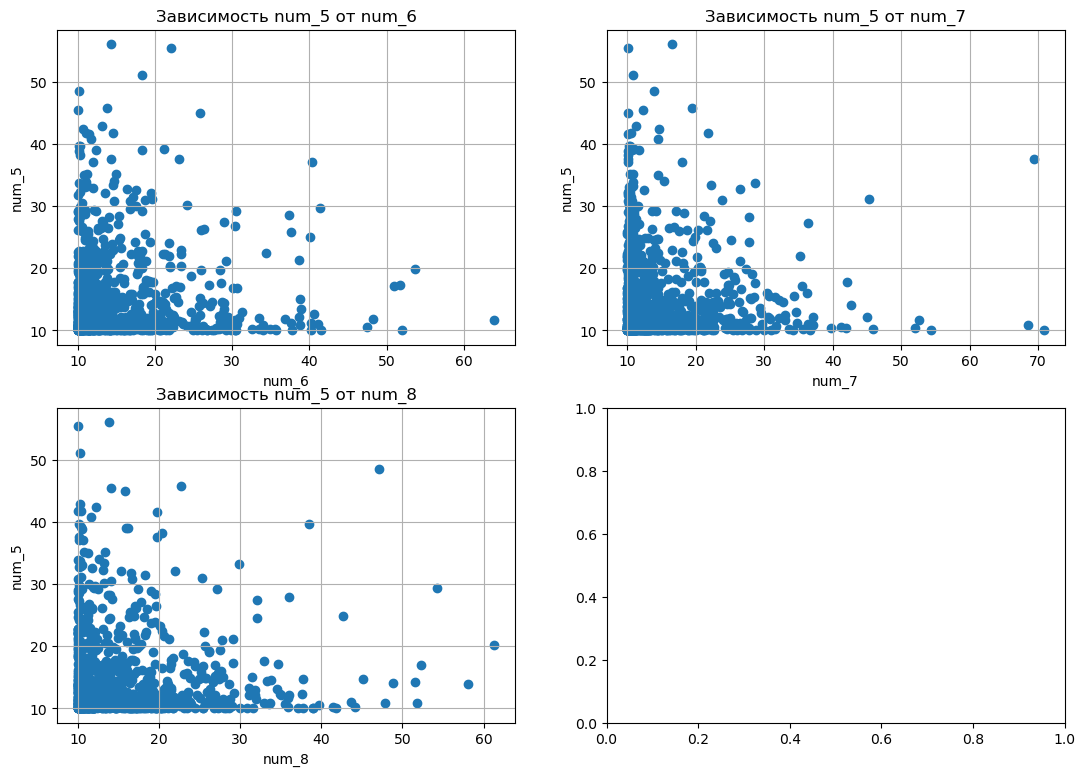

****************************** Колонка  num_6 ******************************


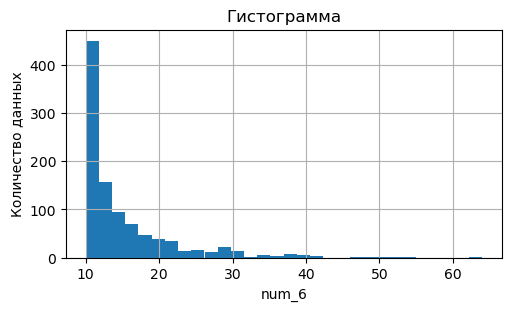

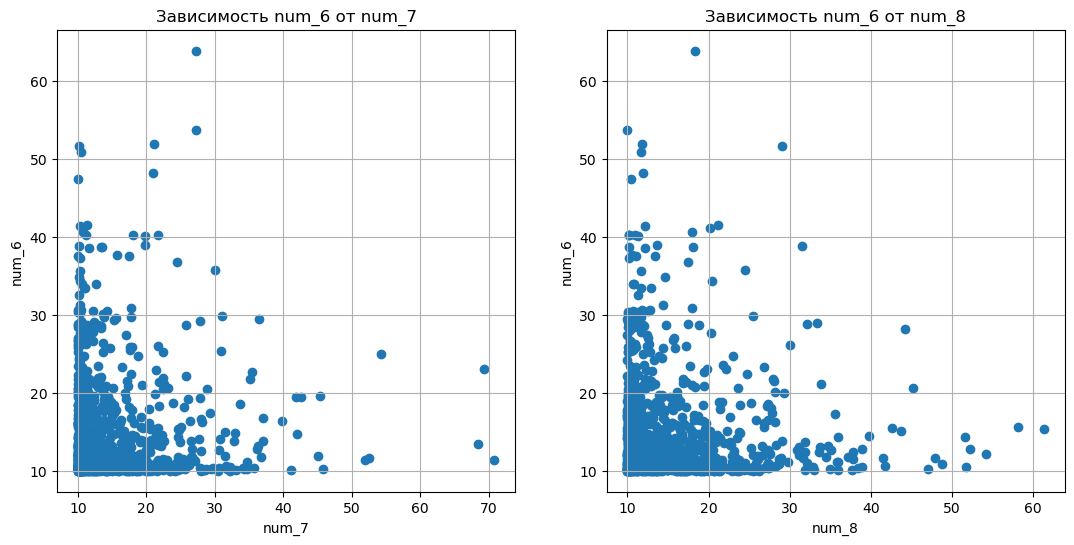

****************************** Колонка  num_7 ******************************


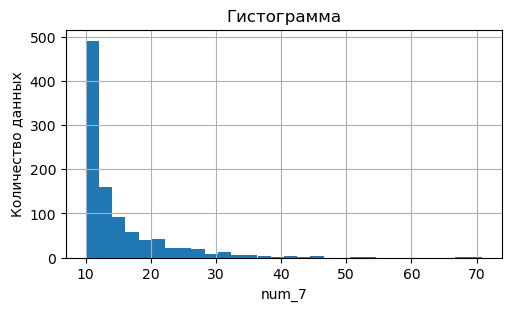

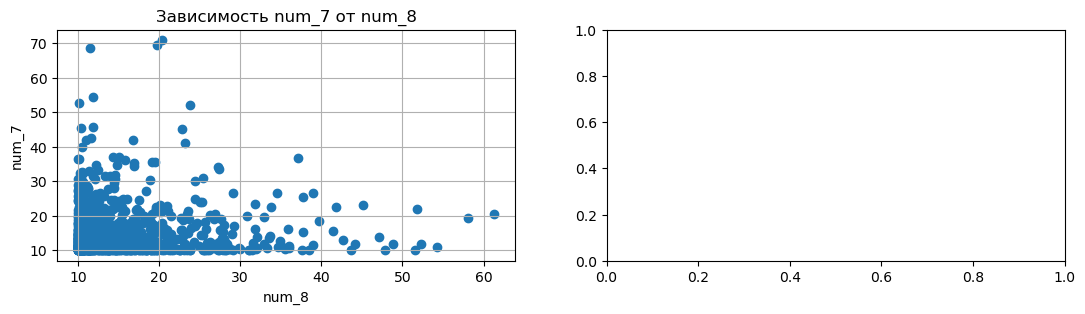

****************************** Колонка  num_8 ******************************


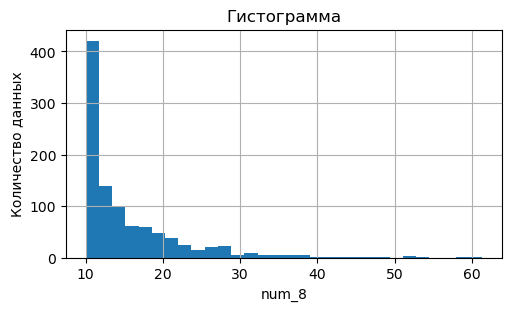

In [7]:
dependency_analysis(data=df, columns=num_cols_names)